# Problem 3 

## Problem Description

In this problem you will use `sklearn.svm.SVR` to train a support vector machine for a regression problem. Your model will predict G forces experienced by a sports car as it travels through a chicane in the Nurburgring.

Fill out the notebook as instructed, making the requested plots and printing necessary values. 

*You are welcome to use any of the code provided in the lecture activities.*

#### Summary of deliverables:

Results:
- Plot the fitted SVR function for three different epsilon values
- Compute the R2 score for each of the fitted functions

Discussion:
- Discuss the performance of the models and the effect of epsilon

#### Imports and Utility Functions:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR

def plot_data(X, y, ax = None):
    if ax is None:
        ax = plt.gca()
        showflag = True
    else:
        showflag = False
    ax.scatter(X,y, c = 'blue')
    ax.set_xlabel('Normalized Position')
    ax.set_ylabel('G Force')
    if showflag:
        plt.show()
    else:
        return ax
    
def plot_svr(model, X, y):
    ax = plt.gca()
    ax = plot_data(X, y, ax)
    xs = np.linspace(min(X), max(X), 1000).reshape(-1,1)
    ys = model.predict(xs)
    ax.plot(xs,ys,'r-')
    plt.legend(['Data', 'Fitted Function'])
    plt.show()


# Load and visualize the data

The data is contained in `nurburgring.npy` and can be loaded with `np.load()`. The first column corresponds to the normalized position of the car in the chicane, and the second column corresponds to the measured G force experienced at that point in the chicane.

Store the data as:
- `X` (Nx1) array of position data
- `y` N-dimensional vector of G force data

Then visualize the data with `plot_data(X,y)`

Note: use X.reshape(-1,1) to make the `X` array two dimensional as required by 'SVR.fit(X,y)'

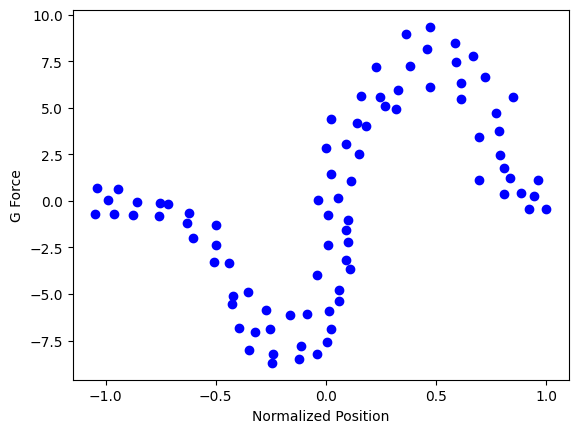

In [8]:
data = np.load("data/nurburgring.npy")
X = data[:, 0:1].reshape(-1, 1)
y = data[:, 1]
plot_data(X, y)

# Train Support Vector Regressors

Train three different support vector regressors using the RBF Kernel, C = 100, and epsilon = [1, 5, 10]. For each model, report the coefficient of determination ($R^2$) for the fitted model using the builtin sklearn function} `model.score(X,y)`, and plot the fitted function against the data using `plot_svr(model, X, y)`

Epsilon = 1, R^2 = 0.8039


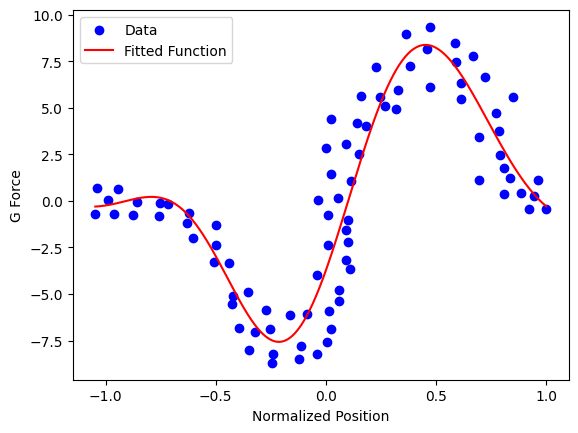

Epsilon = 5, R^2 = 0.6412


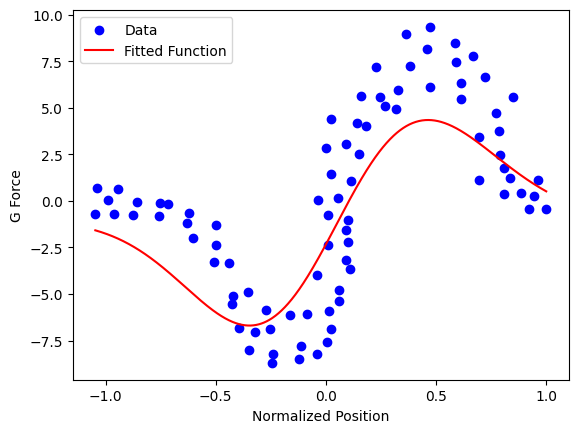

Epsilon = 10, R^2 = -0.0056


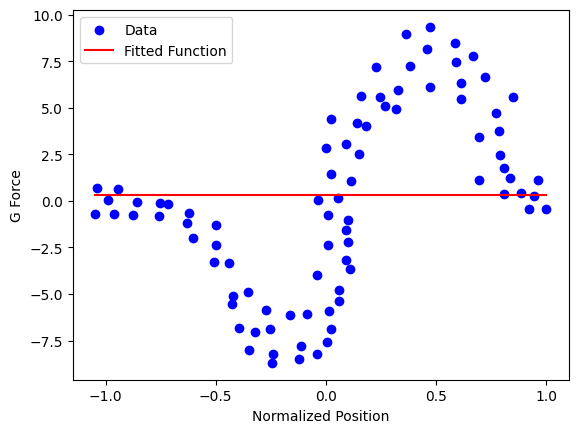

In [12]:
epsilon = [1, 5, 10]
for ep in epsilon:
    svr = SVR(kernel='rbf', C=100, epsilon=ep)
    svr.fit(X, y)
    score = svr.score(X, y)
    print(f"Epsilon = {ep}, R^2 = {score:.4f}")
    plot_svr(svr, X, y)    

# Discussion

Briefly discuss the performance of the three models, and explain how the value of epsilon influences the fitted model within the context of epsilon insenstive loss introduced in lecture.

Epsilon = 1, R^2 = 0.8039: the fitted function closely follows the data.The R^2 value is high, indicating a strong fit. Not so sensitive to noise and overfits

Epsilon = 5, R^2 = 0.6412: this model is underfitting. The line is much smoother and fails to capture the full data and R^2 value dropped confirming a poor fit

Epsilon = 10, R^2 = -0.0056: This is essentially a flat line, R^2 value is negative which is worse

Small epsilon creates a narrow tube and the model is forced to be flexible and overfitting.

Large epsilon creates a wide tube and all data points fit inside this tube, this leads to overly simple and underfit model.

The epsilon defines the width of a tube or margin. Any data that falls inside this tube contributes zero to the loss function. The points outside the margin are errors the model must try to minimize. When the loss becomes zero, only thats left is the penalty of complexity, so it keeps the model simple. The absolute simplest model is a flat line, hence we have flat line on the last plot.